In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./dataset/yelp_academic_dataset_business.csv')
df.columns

IOError: File ./dataset/yelp_academic_dataset_business.csv does not exist

In [2]:
df.columns  = df.columns.str.replace('attributes.','')
df.columns

Index([u'Ambience.divey', u'Dietary Restrictions.vegan', u'Happy Hour',
       u'hours.Thursday.open', u'Order at Counter',
       u'Hair Types Specialized In.africanamerican',
       u'Hair Types Specialized In.kids', u'BYOB', u'hours.Friday.open',
       u'Good For.latenight', u'Outdoor Seating', u'Alcohol',
       u'Ambience.classy', u'By Appointment Only', u'Parking.lot',
       u'business_id', u'Ambience.touristy', u'Corkage', u'hours.Tuesday.open',
       u'Good For.brunch', u'categories', u'Waiter Service',
       u'hours.Monday.open', u'name', u'Parking.street', u'Ambience.hipster',
       u'BYOB/Corkage', u'Hair Types Specialized In.straightperms',
       u'Music.live', u'Dietary Restrictions.dairy-free',
       u'Music.background_music', u'Price Range', u'Good For.breakfast',
       u'Parking.garage', u'Music.karaoke', u'Good For Dancing',
       u'review_count', u'Hair Types Specialized In.asian', u'state',
       u'Accepts Credit Cards', u'hours.Friday.close', u'Good For.lu

In [3]:
#df = pd.read_csv('yelp_academic_dataset_review.csv')
userDf = pd.read_csv('./yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_user.csv')

This section will examine the users.

In [4]:
#print userDf
print userDf.columns
print userDf.dtypes

print userDf.describe()

Index([u'yelping_since', u'compliments.plain', u'review_count', u'friends',
       u'compliments.cute', u'compliments.writer', u'fans',
       u'compliments.note', u'type', u'compliments.hot', u'compliments.cool',
       u'compliments.profile', u'average_stars', u'compliments.more', u'elite',
       u'name', u'user_id', u'votes.cool', u'compliments.list', u'votes.funny',
       u'compliments.photos', u'compliments.funny', u'votes.useful'],
      dtype='object')
yelping_since           object
compliments.plain      float64
review_count             int64
friends                 object
compliments.cute       float64
compliments.writer     float64
fans                     int64
compliments.note       float64
type                    object
compliments.hot        float64
compliments.cool       float64
compliments.profile    float64
average_stars          float64
compliments.more       float64
elite                   object
name                    object
user_id                 object
votes.c

/Users/PatrickYu/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


       compliments.plain   review_count  compliments.cute  compliments.writer  \
count      126161.000000  686556.000000      25210.000000        79860.000000   
mean           21.146860      25.757102          7.155137           12.705923   
std           206.627582      83.755973         86.769151           91.147918   
min             1.000000       0.000000          1.000000            1.000000   
25%                  NaN       2.000000               NaN                 NaN   
50%                  NaN       5.000000               NaN                 NaN   
75%                  NaN      17.000000               NaN                 NaN   
max         22674.000000   10897.000000      12638.000000        13152.000000   

                fans  compliments.note  compliments.hot  compliments.cool  \
count  686556.000000     102211.000000     74965.000000     101007.000000   
mean        1.290100         11.124135        25.035923         25.990753   
std        11.501621         83.222045 

In [5]:
#convert string to timestampe
userDf['joined']= pd.to_datetime(userDf['yelping_since'])
#group by year and count occurrences
yearGrouping = userDf.groupby(userDf['joined'].map(lambda x : x.year))['yelping_since'].count()


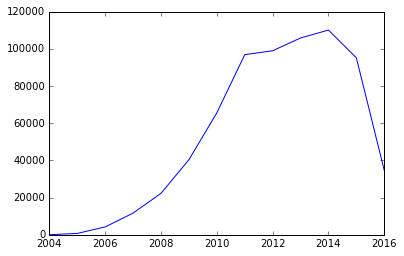

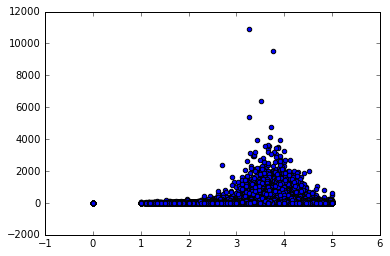

In [6]:
%matplotlib inline

plt.figure()
plt.plot(yearGrouping)
plt.figure()
plt.scatter(userDf['average_stars'],userDf['review_count'])

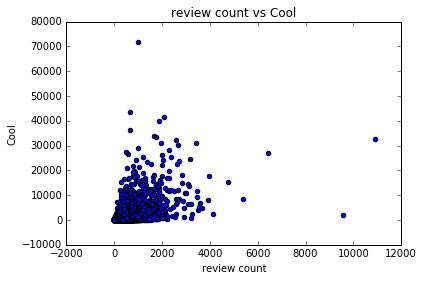

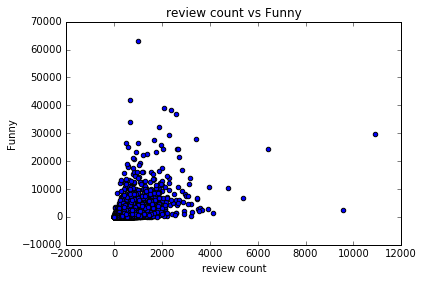

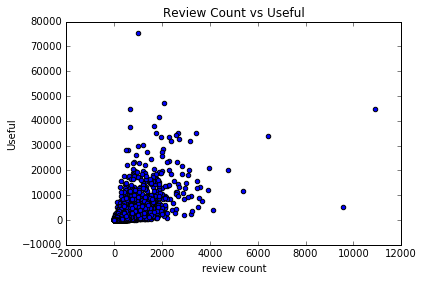

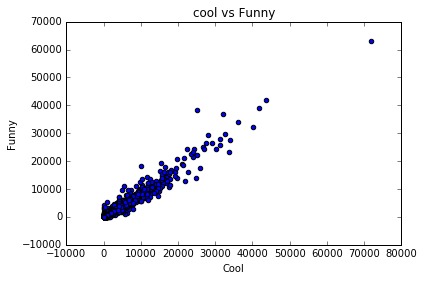

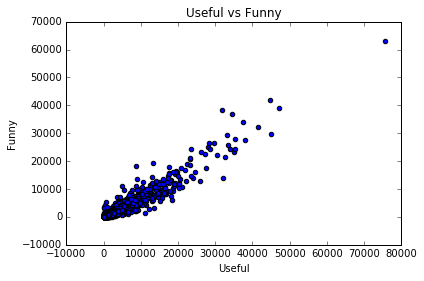

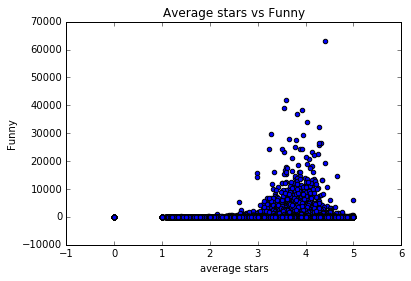

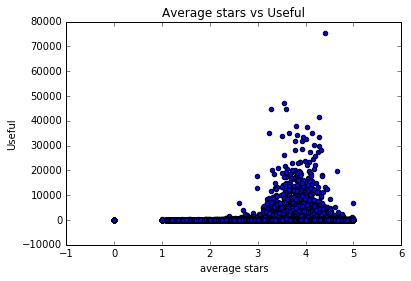

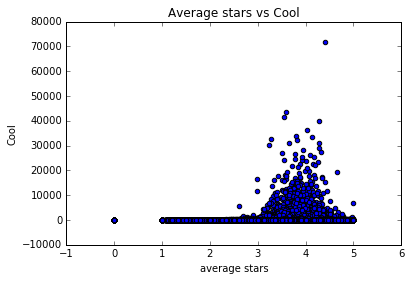

In [7]:
%matplotlib inline

#cool vs. review count
plt.figure()
plt.title("review count vs Cool")
plt.scatter(userDf['review_count'],userDf['votes.cool'])
plt.xlabel('review count')
plt.ylabel('Cool')

plt.figure()
plt.title('review count vs Funny')
plt.scatter(userDf['review_count'],userDf['votes.funny'])
plt.xlabel('review count')
plt.ylabel('Funny')

plt.figure()
plt.title('Review Count vs Useful')
plt.scatter(userDf['review_count'],userDf['votes.useful'])
plt.xlabel('review count')
plt.ylabel('Useful')

plt.figure()
plt.title('cool vs Funny')
plt.scatter(userDf['votes.cool'],userDf['votes.funny'])
plt.xlabel('Cool')
plt.ylabel('Funny')

plt.figure()
plt.title('Useful vs Funny')
plt.scatter(userDf['votes.useful'],userDf['votes.funny'])
plt.xlabel('Useful')
plt.ylabel('Funny')

plt.figure()
plt.title('Average stars vs Funny')
plt.scatter(userDf['average_stars'],userDf['votes.funny'])
plt.xlabel('average stars')
plt.ylabel('Funny')

plt.figure()
plt.title('Average stars vs Useful')
plt.scatter(userDf['average_stars'],userDf['votes.useful'])
plt.xlabel('average stars')
plt.ylabel('Useful')

plt.figure()
plt.title('Average stars vs Cool')
plt.scatter(userDf['average_stars'],userDf['votes.cool'])
plt.xlabel('average stars')
plt.ylabel('Cool')

According to the plots, cool and funny are strongly positievly correlated. 

All figures with the average stars indicate left-skewed normal distributions.

[[ 4.14]
 [ 3.67]
 [ 3.68]
 ..., 
 [ 5.  ]
 [ 5.  ]
 [ 5.  ]]
3.7467039251 1.0868314298


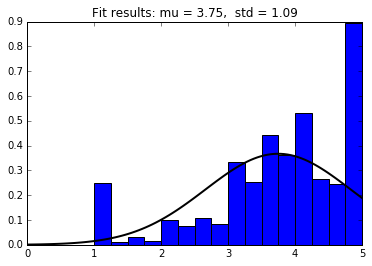

In [8]:
from scipy.stats import norm
import numpy as np

reviewStars = userDf[['average_stars']]
#print type(reviewStars)
#print reviewStars.dtypes
#print reviewStars
reviewStars = reviewStars.as_matrix()
print reviewStars
mu, std = norm.fit(reviewStars)
print mu,std
plt.hist(reviewStars, bins=20, normed=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [9]:
import networkx as nx
import ast

userDf['number of Friends'] = userDf['friends'].apply( lambda x : len(ast.literal_eval(x)))

The reason 82 friends was used is because it is 2 std deviations away from the mean making the possibility that some users randomly have more friends extremely unlikely. 

Also due to the extreme outliers, people with over 82 firends, the mean is shifted to the right whereas the median is 0. Most users have no friends for all quartiles except for the upper 75%.

count    686556.000000
mean          6.123936
std          37.597752
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max        3795.000000
Name: number of Friends, dtype: float64
median:  0.0
Number of users with over 82 friends:  6296
Number of users with friends:  298361


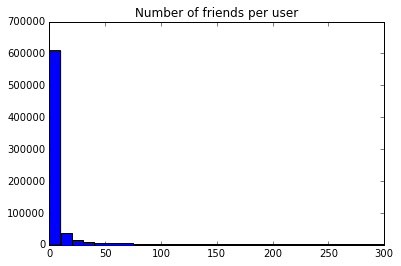

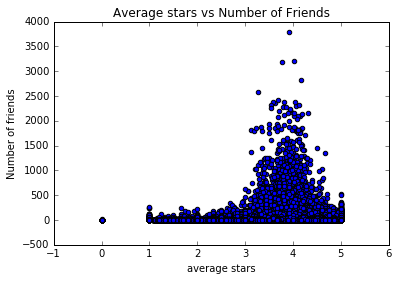

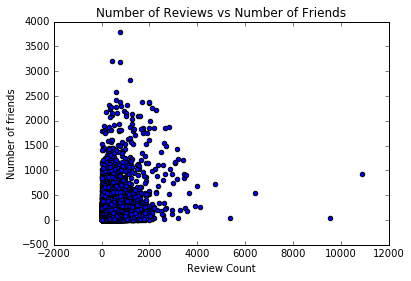

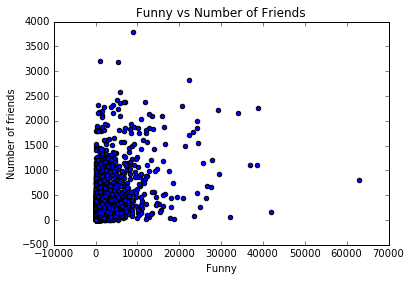

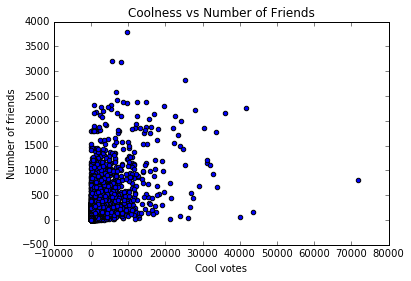

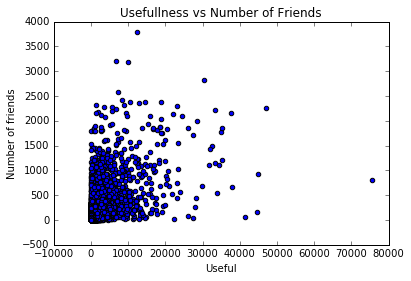

In [10]:
print userDf['number of Friends'].describe()
print 'median: ',userDf['number of Friends'].median()
print 'Number of users with over 82 friends: ',userDf[userDf['number of Friends']>100].shape[0]
print 'Number of users with friends: ',userDf[userDf['number of Friends']!=0].shape[0]

bins = [0,10,20,30,40,50,75,100,200,300,400,500,2000]
plt.hist(userDf['number of Friends'],bins)
plt.axis([0, 300, 0, 700000])
plt.title("Number of friends per user")
xmin, xmax = plt.xlim()

plt.figure()
plt.title('Average stars vs Number of Friends')
plt.scatter(userDf['average_stars'],userDf['number of Friends'])
plt.xlabel('average stars')
plt.ylabel('Number of friends')

plt.figure()
plt.title('Number of Reviews vs Number of Friends')
plt.scatter(userDf['review_count'],userDf['number of Friends'])
plt.xlabel('Review Count')
plt.ylabel('Number of friends')

plt.figure()
plt.title('Funny vs Number of Friends')
plt.scatter(userDf['votes.funny'],userDf['number of Friends'])
plt.xlabel('Funny')
plt.ylabel('Number of friends')

plt.figure()
plt.title('Coolness vs Number of Friends')
plt.scatter(userDf['votes.cool'],userDf['number of Friends'])
plt.xlabel('Cool votes')
plt.ylabel('Number of friends')

plt.figure()
plt.title('Usefullness vs Number of Friends')
plt.scatter(userDf['votes.useful'],userDf['number of Friends'])
plt.xlabel('Useful')
plt.ylabel('Number of friends')

In [11]:
userDf['eliteUser'] =  userDf['elite']!='[]'
print userDf.dtypes
eliteUsers = userDf[userDf['eliteUser']==True]

yelping_since                  object
compliments.plain             float64
review_count                    int64
friends                        object
compliments.cute              float64
compliments.writer            float64
fans                            int64
compliments.note              float64
type                           object
compliments.hot               float64
compliments.cool              float64
compliments.profile           float64
average_stars                 float64
compliments.more              float64
elite                          object
name                           object
user_id                        object
votes.cool                      int64
compliments.list              float64
votes.funny                     int64
compliments.photos            float64
compliments.funny             float64
votes.useful                    int64
joined                 datetime64[ns]
number of Friends               int64
eliteUser                        bool
dtype: objec

# YO YO YO We got elite users
I grabbed the labeled elite and now lets see what makes them special, yeah?
I think we are going to find that it has a lot to do with the number of reviews, friends, fans, etc.

Im tring out tpot for automating the model, and parameter selection.